In [1]:
from utils.processing import Processing
import mne

baboard - WARNING - New version of BrainAccessBoard available:                 1.1.3 (current: 1.1.2)
baboard - WARNING - New version of BrainAccessBoard available:                 1.1.3 (current: 1.1.2)


In [174]:
# fname = "hyperscanning_recordings/subj-5_ses-S001_task-12_run-001_20240226_155815_eeg_226d998a-69d0-4519-8aa5-ad2b58c34bcb-raw.fif"

In [175]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(
    sample_data_folder, "MEG", "sample", "sample_audvis_filt-0-40_raw.fif"
)
raw = mne.io.read_raw_fif(sample_data_raw_file)

In [176]:
# raw = mne.io.read_raw_fif(fname)
raw.crop(tmax=60.0).pick(picks=["eeg"])
raw.load_data()

Measurement date,"December 03, 2002 19:01:10 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,146 points
Good channels,59 EEG
Bad channels,EEG 053
EOG channels,Not available
ECG channels,Not available
Sampling frequency,150.15 Hz
Highpass,0.10 Hz
Lowpass,40.00 Hz


In [177]:
raw.plot(scalings="auto")

In [178]:
import os

import mne
from mne.preprocessing import ICA, corrmap, create_ecg_epochs, create_eog_epochs

In [179]:
raw.ch_names

['EEG 001',
 'EEG 002',
 'EEG 003',
 'EEG 004',
 'EEG 005',
 'EEG 006',
 'EEG 007',
 'EEG 008',
 'EEG 009',
 'EEG 010',
 'EEG 011',
 'EEG 012',
 'EEG 013',
 'EEG 014',
 'EEG 015',
 'EEG 016',
 'EEG 017',
 'EEG 018',
 'EEG 019',
 'EEG 020',
 'EEG 021',
 'EEG 022',
 'EEG 023',
 'EEG 024',
 'EEG 025',
 'EEG 026',
 'EEG 027',
 'EEG 028',
 'EEG 029',
 'EEG 030',
 'EEG 031',
 'EEG 032',
 'EEG 033',
 'EEG 034',
 'EEG 035',
 'EEG 036',
 'EEG 037',
 'EEG 038',
 'EEG 039',
 'EEG 040',
 'EEG 041',
 'EEG 042',
 'EEG 043',
 'EEG 044',
 'EEG 045',
 'EEG 046',
 'EEG 047',
 'EEG 048',
 'EEG 049',
 'EEG 050',
 'EEG 051',
 'EEG 052',
 'EEG 053',
 'EEG 054',
 'EEG 055',
 'EEG 056',
 'EEG 057',
 'EEG 058',
 'EEG 059',
 'EEG 060']

In [180]:
filt_raw = raw.copy().filter(l_freq=1.0, h_freq=40)

In [181]:
ica = ICA(n_components=4, max_iter="auto", random_state=97)
ica.fit(filt_raw)
ica

Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,13 iterations on raw data (9010 samples)
ICA components,4
Available PCA components,59
Channel types,eeg
ICA components marked for exclusion,—


In [182]:
explained_var_ratio = ica.get_explained_variance_ratio(filt_raw)
for channel_type, ratio in explained_var_ratio.items():
    print(
        f"Fraction of {channel_type} variance explained by all components: " f"{ratio}"
    )

Fraction of eeg variance explained by all components: 0.7660273470366211


In [183]:
explained_var_ratio = ica.get_explained_variance_ratio(
    filt_raw, components=[0], ch_type="eeg"
)
# This time, print as percentage.
ratio_percent = round(100 * explained_var_ratio["eeg"])
print(
    f"Fraction of variance in EEG signal explained by first component: "
    f"{ratio_percent}%"
)

Fraction of variance in EEG signal explained by first component: 33%


In [184]:
raw.load_data()
ica.plot_sources(raw, show_scrollbars=False)

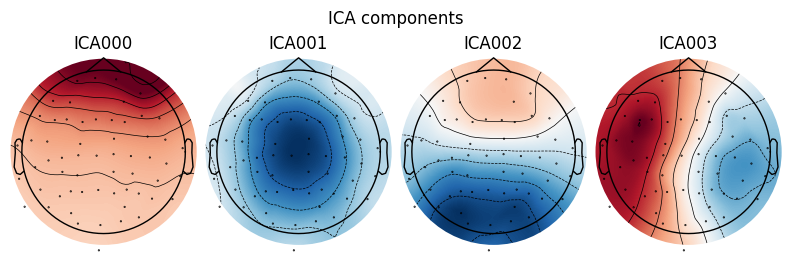

In [185]:
ica.plot_components();

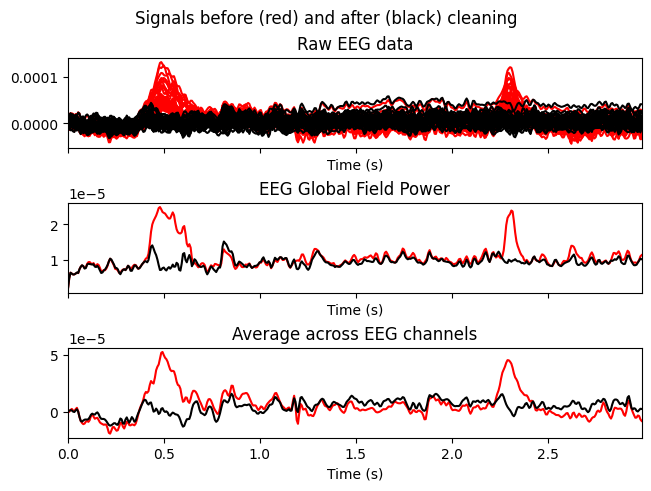

In [186]:
ica.plot_overlay(raw, exclude=[0], picks="eeg");

In [193]:
import asrpy
asr = asrpy.ASR(sfreq=raw.info["sfreq"], cutoff=20)
asr.fit(raw)
raw = asr.transform(raw)

In [194]:
raw.plot(scalings="auto")